In [49]:
# check scikit-learn version
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import os
print(os.getcwd())
print(sklearn.__version__)
MULTIPLIER = 100

C:\Users\sathy\OneDrive\Documents\GitHub\GenomicLQ\combined
1.1.1


In [50]:
df = pd.read_csv('data/ccle_alpha_and_beta.csv', index_col=0)
df.head()

,Alpha,1,2,9,10,12,13,14,15,16,...,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829,Beta
22rv1,0.28000,4.423446,4.134148,10.505010,4.180319,3.828985,3.416169,8.924422,3.547737,10.489760,...,5.662483,3.535540,5.441015,4.484159,3.272955,3.932815,3.518021,4.202408,4.675101,5.625000e-08
42mgba,0.15420,6.856747,3.792826,8.117941,4.300842,3.534361,3.465385,8.689804,3.730495,10.063663,...,4.894637,3.717672,4.600157,3.986362,3.102421,4.577944,3.650426,3.155024,4.213095,2.409000e-02
5637,0.32400,3.817624,3.769035,7.944338,4.000219,4.793569,4.246643,9.218668,3.775753,8.843498,...,5.375774,3.438822,5.457984,5.054120,3.542372,4.057933,3.664296,3.268805,7.120733,9.217000e-03
647v,0.06075,4.322558,3.730195,8.515086,4.421911,3.894124,3.649778,8.962272,3.469970,10.341420,...,5.286006,3.415911,4.769920,4.744037,3.426386,4.216155,3.417696,3.374419,6.135024,6.135000e-02
769p,0.16090,4.020103,3.846175,8.278318,4.400144,4.855821,3.731236,9.109365,3.576632,10.172053,...,5.318118,3.583233,4.643916,4.882646,3.490162,4.041154,3.375546,3.291270,4.529068,1.736000e-02


In [51]:
y_aonly = df['Alpha']
beta_col = df['Beta'].apply(lambda x:x*MULTIPLIER)
y_comb = pd.concat([y_aonly, beta_col], axis=1)
y_comb.head()

,Alpha,Beta
22rv1,0.28000,0.000006
42mgba,0.15420,2.409000
5637,0.32400,0.921700
647v,0.06075,6.135000
769p,0.16090,1.736000


In [52]:
df.drop(['Alpha', 'Beta'], axis=1, inplace=True)
X = df

In [53]:
X.head()

,1,2,9,10,12,13,14,15,16,18,...,100628307,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829
22rv1,4.423446,4.134148,10.505010,4.180319,3.828985,3.416169,8.924422,3.547737,10.489760,5.448634,...,3.641889,5.662483,3.535540,5.441015,4.484159,3.272955,3.932815,3.518021,4.202408,4.675101
42mgba,6.856747,3.792826,8.117941,4.300842,3.534361,3.465385,8.689804,3.730495,10.063663,7.104628,...,3.527367,4.894637,3.717672,4.600157,3.986362,3.102421,4.577944,3.650426,3.155024,4.213095
5637,3.817624,3.769035,7.944338,4.000219,4.793569,4.246643,9.218668,3.775753,8.843498,3.573155,...,3.502305,5.375774,3.438822,5.457984,5.054120,3.542372,4.057933,3.664296,3.268805,7.120733
647v,4.322558,3.730195,8.515086,4.421911,3.894124,3.649778,8.962272,3.469970,10.341420,6.962116,...,3.402495,5.286006,3.415911,4.769920,4.744037,3.426386,4.216155,3.417696,3.374419,6.135024
769p,4.020103,3.846175,8.278318,4.400144,4.855821,3.731236,9.109365,3.576632,10.172053,4.266400,...,3.720749,5.318118,3.583233,4.643916,4.882646,3.490162,4.041154,3.375546,3.291270,4.529068


In [54]:
alpha_fs = ['10085', '8644', '5054', '84561', '157740', '857', '401387', '22943', '11245', '79083', '2123', '54732', '55692', '8508', '5613', '3487', '6236', '8315', '3298', '56937', '4600', '1645', '11046', '3176', '23657', '3066', '51526', '2621', '4071', '245911', '58472', '1728', '63893', '26022', '55728', '63898', '439927', '51071', '23032', '135228', '9793', '93058', '51133', '316', '84141', '55964', '1803', '100287896', '10911', '23240', '9124', '770', '7554', '23596', '5507', '25845', '57695', '100506328', '23167', '347252', '2131', '6281', '83987', '8715', '91137', '716', '4613', '28968', '10544', '6921', '146225', '51057', '128866', '9060', '8717', '1911', '3995', '1734', '201725', '5352', '10346', '10016', '83882', '1875', '226', '151258', '3575', '26167', '90317', '63874', '153241', '4907', '27035', '57214', '64859', '23173', '56916', '6900', '9637', '10397', '54149', '11331', '25776', '645', '10116', '26009', '92162', '5903', '1303', '51728', '8334', '5010', '6447', '3075', '4035', '304', '285547', '22849', '64223', '9987', '796', '115584', '261729', '1382', '285600', '390', '8495', '81858', '9582', '3800', '83452', '80311', '55920', '125476', '4149', '6645', '1600', '92737', '1491', '79585', '401', '151887', '81671', '89932', '3990', '5676', '11098', '55917', '11145', '53335', '56243', '55239', '7840', '84833', '3750', '9057', '23659', '22895', '1024', '23149', '55799', '7277', '11343', '22885', '80835', '83872', '8942', '4148', '282566', '3329', '7072', '80063', '140886', '4998', '3344', '9180', '5787', '388021', '222962', '374393', '83479', '9196', '10468', '57185', '653121', '11019', '5789', '63946', '913', '492311', '84969', '375704', '80067', '116372', '112616', '84319', '11010', '3958', '126731', '53838', '148189', '148066', '27244', '970', '1876', '79053', '9849', '55741', '284207', '22949', '51142', '169841', '417', '64283', '404201', '386618', '4233', '8347', '65095', '6875', '51606', '65983', '246176', '1749', '100506542', '10038', '79029', '55214', '283352', '6482', '60436', '5471', '23598', '1825', '25907', '80318', '27125', '6368', '51634', '3166', '10730', '9646', '202299', '7145', '151254', '79727', '6867', '55228', '56919', '54988', '393', '11202', '120935', '7011', '4248', '398', '220001', '57212', '83638', '414', '1747', '100292680', '117581', '7357', '23318', '11031', '2124', '3516', '284099', '7039', '286827', '6304', '2978', '53354', '54949', '5961', '79441', '3912', '27286', '91734', '283677', '9495', '51209', '6532', '49856', '84926', '144568', '644809', '207107', '23131', '221938', '5329', '9249', '4676', '3426', '8629', '57531', '60558', '100132074', '5137', '57150', '339290', '8936', '645566', '29991', '54822', '3673', '80224', '6201', '822', '339965', '5145', '84962', '4286', '285527', '4856', '53826', '3930', '5881', '9889', '6626', '667', '10137', '6133', '140578', '6664', '1180', '84189', '1057', '6619', '125150', '90321', '392617', '1543', '339834', '8365', '80155', '10981', '26065', '6426', '26354', '10650', '166378', '4082', '1601', '26471', '79712', '80206', '100287932', '653483', '129080', '56475', '3228', '160492', '150051', '284013', '57180', '3093', '169834', '197003', '403341', '11257', '23387', '3490', '64850', '84830', '55970', '6160', '2882', '79187', '3068', '54809', '136', '1390', '1789', '5031', '133957', '286451', '2876', '28986', '7057', '79642', '80308', '7249', '5806', '26751', '55211', '55018', '79096', '92595', '2', '11075', '9108', '273', '4820', '83903', '905', '55280', '9191', '22869', '9270', '1602', '646588', '64759', '136227', '147381', '11243', '4074', '221786', '158586', '84624', '25763', '114884', '148113', '8123', '54790', '3070', '100169989', '56652', '23361', '2035', '10577', '388695', '3005', '139596', '2317', '7597', '221322', '54947', '120379', '6303', '26999', '1327', '4752', '23467', '5917', '54103', '57708', '149345', '132660', '55080', '254295', '339803', '90459', '203430', '47', '8743', '1012', '8603', '23252', '51263', '221120', '2817', '4245', '7547', '29107', '51110', '57674', '100131067', '10554', '1908', '23077', '8614', '403', '55699', '84513', '27236', '11072', '493', '60673', '7976', '84970', '54853', '1407', '9801', '80176', '10001', '5100', '22936', '11267', '84366', '3948', '131405', '100506100', '2554', '115273', '646484', '22903', '23410', '339983', '928', '9214', '317662', '29071', '2677', '3133', '116442', '9229', '9925', '84896', '10921', '51444', '4052', '6347', '1000', '93973', '200539', '388531', '8601', '23133', '6903', '4281', '54849', '2335', '219738', '6277', '57001', '22836', '57493', '2635', '10654', '54870', '253639', '1046', '84253', '8816', '23524', '132851', '121441', '10512', '56112', '4750', '221092', '144809', '401172', '8871', '8549', '27341', '10966', '57478', '3739', '8841', '56901', '4595', '1737', '7571', '129530', '7755', '23244', '51187', '7182', '6885', '57117', '55294', '2027', '10949', '140690', '9755', '55139', '5098', '1305', '3781', '6941', '90102', '92400', '339230', '9368', '22993', '23315', '7009', '2995', '4061', '10438', '9739', '7403', '51023', '10973', '55342', '11151', '80007', '5993', '5412', '402778', '2091', '9421', '53827', '55802', '3675', '8820', '282679', '80196', '54463']

In [55]:
beta_fs = ['1026', '4680', '83468', '23242', '56034', '84141', '1825', '8204', '91947', '27324', '5325', '81792', '195814', '23052', '26136', '26103', '11227', '1294', '9966', '169834', '100129196', '100128098', '200159', '163183', '56925', '146713', '10653', '26080', '355', '5816', '3883', '283352', '8518', '857', '56180', '339976', '8125', '3400', '255743', '54221', '90161', '100506606', '51706', '400940', '79836', '3625', '144406', '9014', '7739', '11254', '83450', '9607', '339535', '119395', '412', '256764', '3859', '140886', '92421', '84152', '124093', '11136', '79083', '1795', '261734', '57732', '6558', '132430', '650794', '643616', '388698', '7045', '162494', '399949', '79822', '57619', '9615', '1509', '57787', '1365', '118426', '84692', '767', '5720', '100653022', '84752', '7803', '65059', '160857', '55286', '7369', '55752', '8418', '9369', '79602', '286827', '54716', '128025', '114788', '6662', '2203', '10962', '6502', '79166', '27342', '6764', '400566', '222696', '26577', '64208', '286530', '6319', '26164', '57001', '54545', '7103', '7070', '54935', '222962', '5172', '29988', '151278', '23464', '9488', '5617', '132321', '7403', '776', '586', '30009', '29761', '573', '1734', '7032', '10170', '4100', '79838', '2312', '57459', '27020', '57480', '148109', '56659', '5217', '9961', '54751', '3713', '162966', '283576', '5519', '92292', '4885', '285386', '130940', '79400', '339803', '54520', '306', '65983', '65055', '282980', '112942', '4065', '389289', '6566', '5342', '389932', '118430', '135152', '65109', '732253', '8521', '100292680', '9692', '91646', '642636', '282775', '57169', '9768', '6338', '8504', '140686', '57710', '164684', '55217', '81853', '729967', '83887', '6275', '131616', '51806', '10866', '256227', '10473', '339988', '30010', '55283', '50840', '9696', '9099', '9093', '135932', '26999', '4126', '10548', '84766', '116123', '3934', '7844', '7766', '54842', '203414', '2067', '285313', '55268', '100506530', '9514', '6457', '126661', '55425', '378828', '80727', '3069', '10551', '339210', '9289', '55297', '65990', '640', '51450', '3615', '196993', '11068', '404201', '7031', '170712', '64425', '996', '3157', '79776', '5927', '3741', '4660', '280665', '3767', '64651', '85509', '9757', '563', '4781', '27236', '8365', '100133319', '2566', '123041', '10265', '128486', '9532', '64843', '10628', '10010', '51146', '91120', '8349', '54682', '151176', '54457', '284083', '60509', '10742', '341676', '84525', '369', '1284', '4938', '4250', '7515', '6549', '7341', '339366', '7832', '6091', '63933', '10875', '4633', '100507670', '3875', '6422', '1293', '202333', '399665', '8975', '51010', '1832', '7762', '4905', '80144', '493869', '729', '799', '57150', '86', '84830', '5573', '250', '80237', '84319', '27101', '2259', '9245', '55076', '1462', '130560', '8828', '2799', '340252', '51660', '9806', '5982', '1290', '85016', '57546', '597', '25996', '6947', '401588', '79027', '6820', '8707', '286046', '5118', '117531', '79183', '285855', '5054', '79152', '51060', '80853', '400748', '6368', '285957', '10463', '4151', '7345', '284361', '84318', '51351', '100131510', '1434', '119710', '27122', '9754', '100505696', '1289', '54915', '81696', '140606', '6160', '653238', '400793', '2644', '7913', '140738', '2706', '1545', '80032', '8480', '22903', '94081', '4199', '375484', '90139', '3817', '154214', '2321', '388564', '57758', '307', '26227', '51738', '3422', '115106', '1308', '2196', '55607', '150005', '64782']

In [56]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [57]:
intersected_list = intersection(alpha_fs, beta_fs)
print(intersected_list)
print(len(intersected_list))

['5054', '857', '79083', '84141', '1734', '140886', '222962', '84319', '404201', '65983', '283352', '1825', '6368', '100292680', '286827', '57150', '8365', '169834', '84830', '6160', '26999', '339803', '27236', '22903', '57001', '7403']
26


In [58]:
def union(lst1, lst2):
    lst3 = lst1 + lst2
    return lst3

In [59]:
unioned_list = union(alpha_fs, beta_fs)

In [60]:
unioned_list = set(unioned_list)
print(unioned_list)

{'8644', '57212', '5917', '11046', '1407', '5329', '136', '91947', '54935', '9368', '120379', '8480', '65059', '6091', '160857', '389289', '56919', '23252', '1284', '6558', '6277', '286046', '100505696', '226', '2677', '1600', '25776', '57478', '770', '857', '10085', '117581', '23361', '51110', '1601', '5325', '162494', '653121', '84253', '100506328', '64223', '2027', '51728', '339834', '4680', '147381', '3005', '221322', '573', '80727', '339965', '9060', '126661', '645', '9757', '201725', '54751', '23596', '79602', '64850', '7803', '8365', '1509', '55728', '4126', '55280', '100132074', '63933', '30010', '92292', '245911', '114788', '1795', '8841', '7840', '776', '928', '2566', '57214', '970', '57150', '83468', '7403', '79822', '84525', '4907', '1734', '80835', '26227', '86', '60509', '151254', '9801', '51023', '26136', '84152', '6422', '200539', '7547', '81792', '64651', '51660', '285855', '128866', '10001', '54809', '1180', '3228', '83450', '729967', '80196', '51060', '8743', '2196',

In [61]:
final_fs = df[unioned_list]
final_fs.head()

C:\Users\sathy\AppData\Local\Temp\ipykernel_12392\145540745.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  final_fs = df[unioned_list]


,8644,57212,5917,11046,1407,5329,136,91947,54935,9368,...,29991,6347,8603,219738,586,84896,5342,3750,150051,100169989
22rv1,10.998900,5.781718,11.151557,6.595431,9.935443,5.727147,5.561280,9.033821,8.548310,7.815207,...,5.130750,3.628733,7.674750,7.319458,5.496430,9.633589,3.293701,4.119124,4.081304,4.554428
42mgba,7.281024,5.440389,12.173183,5.797518,9.750468,10.096198,10.403882,5.763001,7.397008,8.873946,...,5.138153,7.417433,7.360027,6.237523,10.346349,7.688914,3.594673,4.636343,4.652290,4.298126
5637,8.867959,4.258495,11.506265,7.154827,9.601500,11.204863,9.760936,9.264789,9.280620,8.772213,...,5.719647,3.518949,7.040351,7.547757,9.723578,7.607565,3.340118,4.707885,7.005847,4.071311
647v,4.157790,4.268764,11.147270,6.729297,9.695840,8.960563,9.148441,8.755786,5.263405,9.046810,...,5.040993,3.793313,7.239108,7.512355,10.196474,9.286920,3.299602,4.419685,5.390059,4.160341
769p,13.179482,5.170552,11.821147,7.415077,9.733454,7.174919,6.741138,6.892417,9.649780,7.950063,...,5.415065,7.897116,7.613174,7.029968,6.049307,9.322921,3.585910,4.805035,4.457974,4.062647


In [62]:
x_train, x_test, y_train, y_test = train_test_split(final_fs, y_comb, test_size=0.1, random_state=7)

In [63]:
# # evaluate multioutput regression model with k-fold cross-validation
# from numpy import absolute
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_regression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.model_selection import RepeatedKFold
#
#
# model = DecisionTreeRegressor()
# # define the evaluation procedure
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate the model and collect the scores
# n_scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# # force the scores to be positive
# n_scores = absolute(n_scores)
# # summarize performance
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [64]:
params = {
        'alpha_1': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'alpha_2': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'alpha_init': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'lambda_1': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        'lambda_2': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        }

In [65]:
%%time
# example of evaluating direct multioutput regression with an SVM model
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge


# model = XGBRegressor(learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.7500000000000001, verbosity=0)
# model = LinearSVR()
model = BayesianRidge()
# model = XGBRegressor()

# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=123)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
n_scores = absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: 0.346 (0.048)
CPU times: total: 188 ms
Wall time: 2.76 s


In [66]:
wrapper.fit(x_train, y_train)

MultiOutputRegressor(estimator=BayesianRidge())

In [67]:
y_pred = wrapper.predict(x_test)/MULTIPLIER
y_pred

array([[ 1.92523307e-03, -5.68308120e-04],
       [ 6.06120287e-03,  3.05794080e-03],
       [ 2.04171313e-04,  2.38051100e-02],
       [ 2.61881165e-03,  1.50146347e-02],
       [ 4.00224271e-03,  8.77926549e-03],
       [ 2.59897479e-03,  5.77233507e-03],
       [ 9.72069159e-04,  1.31912089e-02],
       [ 1.61003477e-03,  3.88378469e-03],
       [ 6.59016772e-03,  8.08697173e-03],
       [ 1.64048767e-03,  1.48348454e-02],
       [ 5.71392698e-03, -4.05968485e-03],
       [ 1.35768473e-03, -1.84442593e-03],
       [ 3.49272025e-03,  1.27185635e-02],
       [ 2.88732334e-03,  9.30630359e-03],
       [ 1.89576696e-03,  1.98875441e-03],
       [ 2.44797278e-03, -3.43309605e-03],
       [ 1.72598467e-03,  1.08578466e-02],
       [ 2.27467981e-03,  4.41879642e-03],
       [ 1.24761068e-03,  1.11250213e-02],
       [ 2.27996876e-03,  2.18315174e-02],
       [ 3.74562662e-03,  1.38865583e-02],
       [ 4.01006471e-03,  1.00020517e-02],
       [ 1.76045679e-03,  1.22810744e-02],
       [ 7.

Slope: 0.008130843215313394
Intercept: 0.0003872646937724258
R-Squared: 0.8124860720043797
P-Value: 4.518262349192201e-19
Standard Error: 0.0005637983121226952


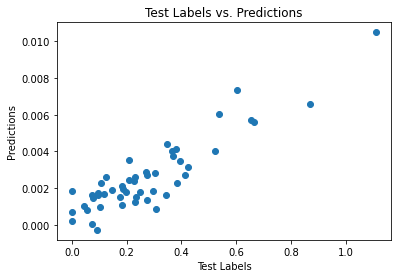

In [68]:
import matplotlib.pyplot as plt
import scipy.stats as stats
X_var = y_test['Alpha']
y_var = y_pred[:,0]
plt.plot(X_var, y_var, 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(X_var, y_var)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value**2)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()

Slope: 0.0044288264829546176
Intercept: 0.005227081932365568
R-Squared: 0.4587089597002417
P-Value: 6.620678789323321e-08
Standard Error: 0.0006944082220956056


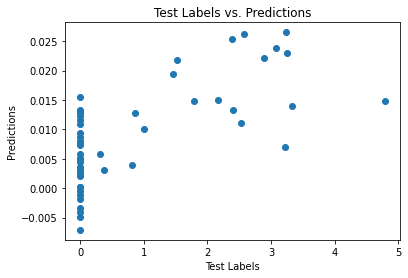

In [69]:
import matplotlib.pyplot as plt
import scipy.stats as stats
X_var = y_test['Beta']
y_var = y_pred[:,1]
plt.plot(X_var, y_var, 'o')
slope, intercept, r_value, p_value, std_err = stats.linregress(X_var, y_var)
print("Slope:", slope)
print("Intercept:", intercept)
print("R-Squared:", r_value**2)
print("P-Value:", p_value)
print("Standard Error:", std_err)
plt.xlabel('Test Labels')
plt.ylabel('Predictions')
plt.title('Test Labels vs. Predictions')
plt.show()

In [70]:
import joblib

joblib.dump(model, 'model_dual.pkl')

['model_dual.pkl']

In [71]:
val_df = pd.read_csv('data/lungvalcombat_cclenonpara.csv', index_col=0)
val_df.head()

,1,2,9,10,12,13,14,15,16,18,...,100628307,100630918,100631378,100642175,100652770,100652791,100653022,100689073,100689074,100820829
@52070900779814082509406072409520.CEL,4.835072,5.475099,8.241666,5.596723,4.970002,5.128590,8.999842,3.175718,10.531796,5.359670,...,3.728857,5.201610,3.504271,7.367079,4.313492,3.325551,4.717769,3.453050,4.487460,6.919225
@52070900779814082509406072409529.CEL,5.291272,4.926867,7.685122,4.470993,4.965099,3.326608,9.283297,3.270530,9.469966,5.189169,...,3.243438,5.007281,3.435278,6.407326,4.412631,3.388058,6.075453,3.544823,2.969377,5.860735
@52070900779815082509406072409580.CEL,3.939082,5.028803,9.470349,4.726313,5.308563,4.540831,9.651312,3.582028,10.388708,3.437093,...,3.788450,6.147211,3.503159,6.903860,5.386633,3.345878,4.463422,3.602249,2.886292,6.400431
@52070900779816082509406072409627.CEL,5.067175,4.744636,8.722097,4.544712,2.140528,3.249454,9.407479,3.319262,11.288427,5.238611,...,3.631284,5.517533,3.429800,6.871086,4.570540,3.367175,5.139208,3.377602,5.424094,4.297978
@52070900779940082209406071606658.CEL,4.935882,4.938880,6.967547,4.428267,5.860314,5.344538,8.997490,3.414086,11.142511,3.766900,...,3.443167,6.008139,3.478054,6.441206,4.464515,3.288812,4.671096,3.349842,6.079224,4.321898


In [72]:

fs_val = val_df[['8644', '57212', '5917', '11046', '1407', '5329', '136', '91947', '54935', '9368', '120379', '8480', '65059', '6091', '160857', '389289', '56919', '23252', '1284', '6558', '6277', '286046', '100505696', '226', '2677', '1600', '25776', '57478', '770', '857', '10085', '117581', '23361', '51110', '1601', '5325', '162494', '653121', '84253', '100506328', '64223', '2027', '51728', '339834', '4680', '147381', '3005', '221322', '573', '80727', '339965', '9060', '126661', '645', '9757', '201725', '54751', '23596', '79602', '64850', '7803', '8365', '1509', '55728', '4126', '55280', '100132074', '63933', '30010', '92292', '245911', '114788', '1795', '8841', '7840', '776', '928', '2566', '57214', '970', '57150', '83468', '7403', '79822', '84525', '4907', '1734', '80835', '26227', '86', '60509', '151254', '9801', '51023', '26136', '84152', '6422', '200539', '7547', '81792', '64651', '51660', '285855', '128866', '10001', '54809', '1180', '3228', '83450', '729967', '80196', '51060', '8743', '2196', '26164', '4074', '140686', '84624', '151887', '27125', '54103', '27342', '7057', '6303', '285386', '80237', '282775', '10650', '53354', '9739', '84766', '100506542', '2978', '254295', '84962', '1024', '5961', '339976', '11136', '53335', '8614', '10949', '149345', '81696', '27020', '3575', '284099', '284013', '51706', '5787', '9214', '93973', '6903', '339210', '23242', '732253', '146225', '57531', '84926', '90459', '57185', '84318', '7145', '30009', '11019', '5881', '115273', '283677', '26999', '9696', '369', '10911', '1875', '90321', '54732', '80206', '140738', '1012', '80308', '7031', '79712', '9421', '55917', '4061', '56925', '400940', '153241', '822', '1026', '140886', '51351', '5145', '282566', '4151', '643616', '51133', '6549', '54870', '7045', '55425', '79083', '11343', '207107', '563', '388564', '374393', '6626', '158586', '151176', '55211', '9768', '140578', '5507', '3741', '163183', '306', '23659', '2882', '4148', '4052', '79166', '3713', '58472', '57493', '9961', '9488', '6338', '54790', '196993', '57619', '125476', '222696', '55214', '4248', '51526', '26354', '22943', '9196', '11072', '57546', '55741', '644809', '55139', '4250', '80032', '273', '84366', '2995', '118426', '54822', '169841', '26751', '92737', '3883', '3948', '7277', '347252', '92162', '10962', '124093', '6566', '100507670', '25763', '5982', '3817', '2876', '144809', '304', '221120', '1543', '57787', '3422', '119710', '56180', '54947', '91734', '57695', '132660', '285600', '10981', '56112', '23131', '5613', '80176', '2091', '339535', '9966', '9925', '22849', '55802', '50840', '355', '10628', '646588', '6664', '6201', '6885', '7369', '2321', '80853', '115584', '389932', '83638', '905', '2124', '2635', '1491', '386618', '4065', '412', '162966', '9754', '5573', '9806', '116372', '60673', '93058', '1876', '55283', '117531', '7755', '51057', '5617', '996', '4781', '79152', '27101', '79585', '7009', '55970', '100128098', '7976', '9532', '11331', '5789', '5031', '29988', '55342', '3176', '79727', '115106', '146713', '250', '4676', '339290', '25845', '9514', '55018', '91137', '10170', '10346', '1545', '4613', '27244', '1382', '401', '129530', '5098', '5137', '8349', '11031', '9889', '716', '401588', '132851', '100506606', '80144', '2706', '1645', '80067', '11098', '796', '57732', '128025', '10463', '197003', '23598', '2123', '246176', '4595', '8504', '91120', '85016', '3912', '160492', '80155', '7103', '6281', '79053', '79096', '150005', '26022', '2554', '151258', '11145', '1911', '60558', '26009', '148189', '132430', '29071', '3625', '388698', '4071', '7357', '9646', '1293', '286530', '11227', '11075', '57480', '25907', '9229', '3487', '261734', '84752', '10730', '3859', '1434', '11267', '9249', '256764', '1747', '100133319', '64425', '54915', '8717', '139596', '10512', '493869', '84561', '22903', '9692', '8508', '3675', '6820', '6941', '8871', '64843', '60436', '5903', '83903', '5054', '140690', '56659', '10554', '118430', '9191', '55294', '56034', '144568', '23387', '128486', '6447', '83887', '100287932', '284083', '55080', '492311', '51738', '5412', '26577', '1289', '375484', '54463', '399949', '27286', '417', '9637', '2817', '10973', '2259', '388695', '55228', '22895', '57674', '100292680', '401387', '8936', '65990', '8315', '3426', '203414', '64283', '378828', '92400', '8975', '8334', '135152', '1308', '144406', '645566', '7597', '57708', '339230', '55076', '913', '100131067', '10548', '51146', '1789', '164684', '1832', '7341', '22869', '23173', '2312', '54545', '3400', '282980', '221092', '4938', '667', '403341', '131405', '125150', '3166', '400793', '83987', '1305', '3157', '9987', '100287896', '393', '57180', '51010', '56243', '27341', '3781', '4885', '9615', '9793', '3490', '4149', '55964', '81671', '398', '112942', '100653022', '81858', '3069', '80224', '83452', '148066', '6304', '23167', '5816', '54716', '2203', '3298', '1390', '650794', '799', '80063', '84692', '133957', '3767', '5720', '63898', '653238', '65109', '1462', '280665', '6319', '7070', '221938', '1365', '6619', '6662', '92421', '123041', '3615', '6426', '26080', '3133', '10137', '9369', '10875', '388531', '53826', '255743', '400566', '2644', '23032', '10116', '6875', '79029', '55920', '23052', '767', '9057', '65983', '5806', '90161', '57459', '9607', '4600', '286451', '28986', '120935', '256227', '116442', '10438', '79027', '56916', '84830', '6368', '84189', '57117', '7766', '4660', '401172', '339988', '3066', '339983', '202333', '6532', '27236', '284207', '23467', '3930', '390', '220001', '1000', '55699', '4633', '10742', '6236', '3516', '119395', '79838', '388021', '5217', '25996', '2621', '57169', '84319', '8521', '1749', '26103', '2067', '26065', '64859', '64782', '195814', '56901', '6921', '4752', '22993', '3070', '9289', '84969', '112616', '11010', '9849', '6867', '169834', '8518', '7011', '4100', '55297', '55239', '84141', '54842', '89932', '8549', '10016', '54520', '3990', '3875', '5993', '148113', '3093', '284361', '154214', '79776', '83882', '8629', '1303', '80311', '8347', '55692', '7554', '100506100', '9495', '375704', '3673', '9108', '10551', '9093', '23318', '51634', '51071', '23244', '642636', '92595', '116123', '170712', '135932', '4035', '5676', '439927', '65095', '23410', '7844', '11202', '55268', '11068', '51209', '6160', '341676', '1290', '54149', '3739', '8601', '2317', '1728', '7739', '404201', '3068', '63874', '10010', '285547', '23077', '5118', '23524', '54221', '8495', '23149', '51444', '2131', '4905', '8715', '7345', '2335', '29107', '7515', '83479', '2799', '90102', '9755', '10265', '79187', '597', '79441', '1294', '100129196', '57710', '340252', '23315', '400748', '84513', '1737', '200159', '7072', '4286', '23464', '100506530', '131616', '6900', '8418', '22836', '51142', '402778', '11254', '53838', '80007', '80318', '317662', '129080', '403', '79642', '1327', '4281', '55286', '9014', '55217', '8816', '9180', '4233', '6133', '202299', '6482', '57001', '130940', '22949', '79400', '91646', '11245', '222962', '653483', '3934', '47', '10921', '9245', '65055', '286827', '23133', '9099', '6764', '22936', '221786', '5172', '4082', '151278', '283352', '3329', '81853', '6275', '339803', '54853', '282679', '8828', '3995', '7762', '84833', '203430', '5471', '9270', '53827', '8204', '140606', '94081', '646484', '135228', '10544', '100131510', '56937', '253639', '23657', '4820', '8942', '166378', '339366', '5100', '729', '1057', '493', '7913', '63893', '285527', '283576', '54988', '5927', '7249', '79183', '8125', '392617', '11257', '64208', '640', '83872', '64759', '130560', '10966', '84970', '157740', '5519', '49856', '27122', '28968', '10468', '2035', '22885', '79836', '51187', '10473', '148109', '54682', '9124', '1602', '414', '10653', '8123', '261729', '4199', '54457', '27035', '5352', '316', '3075', '4998', '10397', '90317', '6457', '126731', '6947', '85509', '7039', '11151', '10866', '90139', '285313', '1803', '136227', '1825', '3344', '51263', '6645', '51806', '5010', '10654', '4750', '8707', '6502', '55752', '54949', '121441', '4245', '7832', '56652', '54849', '56475', '55607', '114884', '7182', '399665', '11243', '285957', '27324', '10038', '9582', '26471', '7571', '8820', '132321', '57758', '55799', '63946', '3800', '3958', '1908', '51450', '1046', '2', '10577', '51606', '4856', '307', '26167', '29761', '23240', '7032', '29991', '6347', '8603', '219738', '586', '84896', '5342', '3750', '150051', '100169989']]

In [74]:
predictions_val = wrapper.predict(fs_val)

In [75]:
print(predictions_val)

[[ 0.27666391 -0.09885705]
 [ 0.34228697  1.23557157]
 [ 0.19897616  0.23042023]
 [ 0.17903942  0.21661275]
 [ 0.07515282  2.60200851]
 [ 0.14802737 -0.46735095]
 [ 0.16377387  1.74949079]
 [ 0.21474546  1.57782331]
 [ 0.18403641  1.17163503]
 [ 0.11285794  1.15496759]
 [ 0.3464262   0.28409743]
 [ 0.30252099  1.4723921 ]
 [ 0.33867603  0.41776245]
 [ 0.31290253 -0.67628122]
 [ 0.47834755  1.21824672]
 [ 0.54378862  0.03490393]
 [ 0.43974934 -0.39325705]
 [ 0.38033997 -0.62485998]
 [ 0.24164117  1.78330082]
 [ 0.34102874  2.33137171]
 [ 0.17934159  1.10335195]
 [ 0.36759573  0.93182387]
 [ 0.37860907  0.54440542]
 [ 0.14315068  0.93730704]
 [ 0.35197241 -0.94404738]
 [ 0.06301816  1.70074019]
 [ 0.20259739  1.09455528]
 [ 0.39193209  1.1538656 ]
 [ 0.40071857  0.77957501]
 [ 0.42835322  0.27134297]
 [ 0.5842256  -0.63363765]
 [ 0.28125408 -0.78291063]
 [ 0.19665349  2.55398629]
 [ 0.19688369  0.06114795]
 [ 0.41077199  0.43497715]
 [ 0.61414544 -0.98763631]
 [ 0.43597326 -0.62817854]
 

In [79]:
val_df = pd.DataFrame({"alpha": predictions_val[:, 0], "beta": predictions_val[:, 1]})
val_df.to_csv("val_predictions.csv")
val_df.head()

,alpha,beta
0,0.276664,-0.098857
1,0.342287,1.235572
2,0.198976,0.230420
3,0.179039,0.216613
4,0.075153,2.602009
